In [ ]:
! pip install -q kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surabhigovil","key":"4b4a01fbc79aa74ee86dab961f0653f5"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 /root/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d 'tanlikesmath/diabetic-retinopathy-resized'

100% 7.24G/7.25G [01:49<00:00, 53.5MB/s]
100% 7.25G/7.25G [01:50<00:00, 70.8MB/s]


In [5]:
import zipfile
from google.colab import files


import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [6]:
! mkdir train_images

In [7]:
! unzip diabetic-retinopathy-resized.zip -d train_images

Streaming output truncated to the last 5000 lines.
  inflating: train_images/resized_train_cropped/resized_train_cropped/44260_right.jpeg  
  inflating: train_images/resized_train_cropped/resized_train_cropped/44261_left.jpeg  
  inflating: train_images/resized_train_cropped/resized_train_cropped/44261_right.jpeg  
  inflating: train_images/resized_train_cropped/resized_train_cropped/44262_left.jpeg  
  inflating: train_images/resized_train_cropped/resized_train_cropped/44262_right.jpeg  
  inflating: train_images/resized_train_cropped/resized_train_cropped/44263_left.jpeg  
  inflating: train_images/resized_train_cropped/resized_train_cropped/44263_right.jpeg  
  inflating: train_images/resized_train_cropped/resized_train_cropped/44264_left.jpeg  
  inflating: train_images/resized_train_cropped/resized_train_cropped/44264_right.jpeg  
  inflating: train_images/resized_train_cropped/resized_train_cropped/44265_left.jpeg  
  inflating: train_images/resized_train_cropped/resized_train_cr

In [15]:
import os
os.listdir('/content/train_images/resized_train_cropped/resized_train_cropped')


['20179_right.jpeg',
 '25312_left.jpeg',
 '2318_left.jpeg',
 '8034_right.jpeg',
 '1049_left.jpeg',
 '9200_right.jpeg',
 '15639_left.jpeg',
 '41179_right.jpeg',
 '10569_left.jpeg',
 '15468_right.jpeg',
 '22665_right.jpeg',
 '36800_right.jpeg',
 '43199_right.jpeg',
 '15530_right.jpeg',
 '18648_left.jpeg',
 '24996_right.jpeg',
 '7582_left.jpeg',
 '12231_left.jpeg',
 '7111_left.jpeg',
 '19149_right.jpeg',
 '3779_left.jpeg',
 '28333_right.jpeg',
 '36118_left.jpeg',
 '24083_left.jpeg',
 '6546_left.jpeg',
 '19928_left.jpeg',
 '17630_right.jpeg',
 '26856_right.jpeg',
 '38203_left.jpeg',
 '37546_right.jpeg',
 '36791_right.jpeg',
 '40916_right.jpeg',
 '33758_left.jpeg',
 '2818_right.jpeg',
 '3249_right.jpeg',
 '39154_right.jpeg',
 '6883_right.jpeg',
 '25507_left.jpeg',
 '39424_left.jpeg',
 '13931_left.jpeg',
 '34792_right.jpeg',
 '26020_left.jpeg',
 '992_right.jpeg',
 '11828_right.jpeg',
 '35680_right.jpeg',
 '33037_right.jpeg',
 '16777_right.jpeg',
 '13568_left.jpeg',
 '4416_left.jpeg',
 '33222

In [9]:
import pandas as pd

train = pd.read_csv('/content/train_images/trainLabels.csv')

train.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


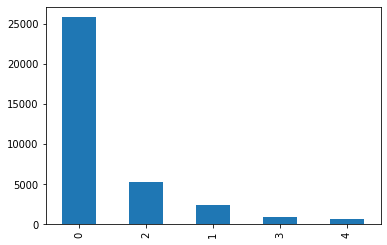

In [10]:
train["level"].value_counts().plot(kind="bar")

In [12]:
! pip install opencv-python

In [2]:
import cv2
import numpy as np
import glob  # for read file from folder
import time  # for estimate processing time(optional)

In [17]:
def load_all_image_from_path(path):
    image_list = []
    for filename in glob.glob(path):
        # load image in gray scale
        im = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        image_list.append(im)
    return image_list

In [4]:
# load image in gray scale
image_query = cv2.imread('/content/train_images/resized_train_cropped/resized_train_cropped/10_left.jpeg', cv2.IMREAD_GRAYSCALE)
train_image_list = cv2.imread("/content/train_images/resized_train_cropped/resized_train_cropped/16896_left.jpeg")

In [5]:
# create ORB dectector
orb = cv2.ORB_create(nfeatures=2000)  # default features is 500

# loop into all train images.
for image_train in train_image_list:
  # find key point and descriptor
  kp_logo, des_logo = orb.detectAndCompute(image_train, None)
  kp_img, des_img = orb.detectAndCompute(image_query, None)

In [8]:
# draw key point on image
result_image_train = cv2.drawKeypoints(image_train, kp_logo, None, flags=0)
result_image_query = cv2.drawKeypoints(image_query, kp_img, None, flags=0)
cv2.imshow("train image",result_image_train)
cv2.imshow("query image",result_image_query)
cv2.waitKey(0)

DisabledFunctionError: ignored

In [11]:
# import the necessary packages
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as si
from skimage.io import imread, imshow
from skimage.color import rgb2gray

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((skimage.img_as_float(imageA) - skimage.img_as_float(imageB)) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()


In [ ]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
right = si.imread("/content/train_images/resized_train/resized_train/16547_right.jpeg")
left = si.imread("/content/train_images/resized_train/resized_train/16547_left.jpeg")

# convert the images to grayscale
right_grayscale = rgb2gray(right)
left_grayscale = rgb2gray(left)


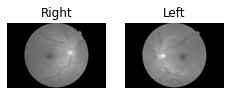

NameError: ignored

In [ ]:
# initialize the figure
fig = plt.figure("Images")
images = ("Right", right_grayscale), ("Left", left_grayscale)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(right_grayscale, left_grayscale, "Right vs. Left")

2. Gaussian Filtered Retina Images Dataset: https://www.kaggle.com/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered



In [12]:
! kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

 97% 415M/427M [00:03<00:00, 138MB/s]
100% 427M/427M [00:03<00:00, 120MB/s]


In [13]:
import zipfile
from google.colab import files


import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [14]:
! unzip diabetic-retinopathy-224x224-gaussian-filtered.zip -d gaussian_images_dataset

Archive:  diabetic-retinopathy-224x224-gaussian-filtered.zip
  inflating: gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  inflating: gaussian_images_dataset/gaussian_filte

In [15]:
import pandas as pd

train_gaussian = pd.read_csv('/content/gaussian_images_dataset/train.csv')

train_gaussian.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [17]:
print(train_gaussian.dtypes)

id_code      object
diagnosis     int64
dtype: object


In [ ]:
train_gaussian['id_code'] = pd.to_numeric(train_gaussian.id_code, errors='coerce')

In [18]:
df_test = pd.DataFrame(data=train_gaussian)

In [20]:
df_test.isna().sum()

id_code      0
diagnosis    0
dtype: int64

In [21]:
df_test.head

<bound method NDFrame.head of            id_code  diagnosis
0     000c1434d8d7          2
1     001639a390f0          4
2     0024cdab0c1e          1
3     002c21358ce6          0
4     005b95c28852          0
...            ...        ...
3657  ffa47f6a7bf4          2
3658  ffc04fed30e6          0
3659  ffcf7b45f213          2
3660  ffd97f8cd5aa          0
3661  ffec9a18a3ce          2

[3662 rows x 2 columns]>

In [22]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df_test, pd.DataFrame), "df needs to be a pd.DataFrame"
    df_test.dropna(inplace=True)
    indices_to_keep = ~df_test.isin([np.nan, np.inf, -np.inf]).any(1)
    return df_test[indices_to_keep].astype(np.float64)

In [24]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train_gaussian['id_code'] = le.fit_transform(df_test.id_code.values)

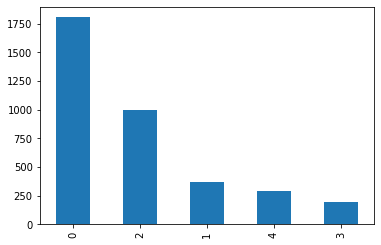

In [25]:
train_gaussian["diagnosis"].value_counts().plot(kind="bar")

In [26]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.io as si
from skimage.color import rgb2gray
import cv2
import os
import matplotlib.image as mpimg


In [27]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	err = np.sum((skimage.img_as_float(imageA) - skimage.img_as_float(imageB)) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

In [28]:
# load the images 

path = '/content/gaussian_images/gaussian_filtered_images/gaussian_filtered_images/'

no_dr = cv2.imread(os.path.join((path + 'No_DR'), '39f8935185e6.png'))
mild = cv2.imread(os.path.join((path + 'Mild'), '5633ced07d8e.png'))
moderate = cv2.imread(os.path.join((path + 'Moderate'), '3a61e690f4bb.png'))
severe = cv2.imread(os.path.join((path + 'Severe'), 'ad2f0b9d059c.png'))
proliferate_dr = cv2.imread(os.path.join((path + 'Proliferate_DR'), '0ceb222f6629.png'))

# resizing the images for consistency
no_dr = cv2.resize(no_dr, (400,400))
mild = cv2.resize(mild, (400,400))
moderate = cv2.resize(moderate, (400,400))
severe = cv2.resize(severe, (400,400))
proliferate_dr = cv2.resize(proliferate_dr, (400,400))

# convert the images to grayscale
no_dr = cv2.cvtColor(no_dr, cv2.COLOR_BGR2GRAY)
mild = cv2.cvtColor(mild, cv2.COLOR_BGR2GRAY)
moderate = cv2.cvtColor(moderate, cv2.COLOR_BGR2GRAY)
severe = cv2.cvtColor(severe, cv2.COLOR_BGR2GRAY)
proliferate_dr = cv2.cvtColor(proliferate_dr, cv2.COLOR_BGR2GRAY)

error: ignored

In [ ]:
# initialize the figure
fig = plt.figure("Diabetic Retina Images Compared by Severity")
images = ("No_DR", no_dr), ("Mild", mild), ("Moderate", moderate), ("Severe", severe), ("Proliferate", proliferate_dr)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 5, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(no_dr, mild, "No_DR vs. Mild")
compare_images(no_dr, moderate, "No_DR vs. Moderate")
compare_images(no_dr, severe , "No_DR vs. Severe")
compare_images(no_dr, proliferate_dr, "No_DR vs. Proliferate")
compare_images(proliferate_dr, mild, "Proliferate vs. Mild")
compare_images(proliferate_dr, moderate, "Proliferate vs. Moderate")
compare_images(proliferate_dr, severe, "Proliferate vs. Severe")
compare_images(proliferate_dr, no_dr, "Proliferate vs. No_DR")
compare_images(severe, mild, "Sever vs. Mild")
compare_images(severe, moderate, "Severe vs. Moderate")
compare_images(severe, proliferate_dr, "Severe vs. Proliferate_DR")
compare_images(severe, no_dr, "Severe vs. No_DR")
compare_images(mild, moderate, "Mild vs Moderate")
compare_images(mild, severe, "Mild vs. Severe")
compare_images(mild, proliferate_dr, "Mild vs. Proliferate_DR")
compare_images(mild, no_dr, "Mild vs. No_DR")
compare_images(moderate, no_dr, "Moderate vs. No_DR")
compare_images(moderate, moderate, "Moderate vs Mild")
compare_images(moderate, severe, "Moderate vs. Severe")
compare_images(moderate, proliferate_dr, "Moderate vs. Proliferate_DR")

KNN based classification

In [29]:
#Creating training and test splits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(df_test, df_test.diagnosis, test_size=0.20)

#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#Training KNN with k=5

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[383   0   0   0   0]
 [  0  67   0   0   0]
 [  0   0 200   0   0]
 [  0   0   0  36   0]
 [  0   0   0   0  47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       383
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        47

    accuracy                           1.00       733
   macro avg       1.00      1.00      1.00       733
weighted avg       1.00      1.00      1.00       733





```
# This is formatted as code
```

K Means + Logistic Regression

1.   List item
2.   List item



In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

class clust():
    def _load_data(self, sklearn_load_ds):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(df_test, df_test.diagnosis, test_size=0.3, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    
    def classify(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))


    def Kmeans(self, output):
        n_clusters = 5
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)
        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

In [39]:
clust(df_test).Kmeans(output="add").classify()

Accuracy: 0.8671519563239308


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

In [35]:
clusters = 5
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(df_test) 
  
print(kmeans.labels_)

[2 2 2 ... 4 4 4]


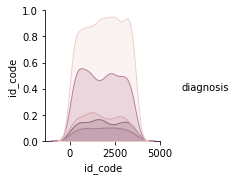

In [36]:
import seaborn as sns 
  
sns.pairplot(df_test ,hue='diagnosis')


In [ ]:
import os

path = '/content/gaussian_images/gaussian_filtered_images/gaussian_filtered_images/'

os.listdir(path)

['No_DR', 'Mild', 'Severe', 'Proliferate_DR', 'Moderate', 'export.pkl']

In [ ]:
#converting images to a dataframe

path = '/content/gaussian_images/gaussian_filtered_images/gaussian_filtered_images/'

data = []
for folder in sorted(os.listdir(path)):
  if not folder.endswith('.pkl'):
    for file in sorted(os.listdir(path + folder)):
      filename, file_extension = os.path.splitext(file)
      data.append((folder, file, filename))

df_images = pd.DataFrame(data, columns=['diagnosis', 'image', 'id_code'])
print (df_images)

     diagnosis             image       id_code
0         Mild  0024cdab0c1e.png  0024cdab0c1e
1         Mild  00cb6555d108.png  00cb6555d108
2         Mild  0124dffecf29.png  0124dffecf29
3         Mild  01b3aed3ed4c.png  01b3aed3ed4c
4         Mild  0369f3efe69b.png  0369f3efe69b
...        ...               ...           ...
3657    Severe  f9156aeffc5e.png  f9156aeffc5e
3658    Severe  fb61230b99dd.png  fb61230b99dd
3659    Severe  fcc6aa6755e6.png  fcc6aa6755e6
3660    Severe  fda39982a810.png  fda39982a810
3661    Severe  fe0fc67c7980.png  fe0fc67c7980

[3662 rows x 3 columns]


In [ ]:
df = pd.merge(train_gaussian, df_images, on='id_code')

print(df)

           id_code  diagnosis_x     diagnosis_y             image
0     000c1434d8d7            2        Moderate  000c1434d8d7.png
1     001639a390f0            4  Proliferate_DR  001639a390f0.png
2     0024cdab0c1e            1            Mild  0024cdab0c1e.png
3     002c21358ce6            0           No_DR  002c21358ce6.png
4     005b95c28852            0           No_DR  005b95c28852.png
...            ...          ...             ...               ...
3657  ffa47f6a7bf4            2        Moderate  ffa47f6a7bf4.png
3658  ffc04fed30e6            0           No_DR  ffc04fed30e6.png
3659  ffcf7b45f213            2        Moderate  ffcf7b45f213.png
3660  ffd97f8cd5aa            0           No_DR  ffd97f8cd5aa.png
3661  ffec9a18a3ce            2        Moderate  ffec9a18a3ce.png

[3662 rows x 4 columns]


In [ ]:
df.drop('diagnosis_y', axis=1, inplace=True)
print(df)

           id_code  diagnosis_x             image
0     000c1434d8d7            2  000c1434d8d7.png
1     001639a390f0            4  001639a390f0.png
2     0024cdab0c1e            1  0024cdab0c1e.png
3     002c21358ce6            0  002c21358ce6.png
4     005b95c28852            0  005b95c28852.png
...            ...          ...               ...
3657  ffa47f6a7bf4            2  ffa47f6a7bf4.png
3658  ffc04fed30e6            0  ffc04fed30e6.png
3659  ffcf7b45f213            2  ffcf7b45f213.png
3660  ffd97f8cd5aa            0  ffd97f8cd5aa.png
3661  ffec9a18a3ce            2  ffec9a18a3ce.png

[3662 rows x 3 columns]


In [ ]:
df.rename(columns={"diagnosis_x": "diagnosis"}, inplace=True)
print(df)

           id_code  diagnosis             image
0     000c1434d8d7          2  000c1434d8d7.png
1     001639a390f0          4  001639a390f0.png
2     0024cdab0c1e          1  0024cdab0c1e.png
3     002c21358ce6          0  002c21358ce6.png
4     005b95c28852          0  005b95c28852.png
...            ...        ...               ...
3657  ffa47f6a7bf4          2  ffa47f6a7bf4.png
3658  ffc04fed30e6          0  ffc04fed30e6.png
3659  ffcf7b45f213          2  ffcf7b45f213.png
3660  ffd97f8cd5aa          0  ffd97f8cd5aa.png
3661  ffec9a18a3ce          2  ffec9a18a3ce.png

[3662 rows x 3 columns]


In [ ]:
df.image

0       000c1434d8d7.png
1       001639a390f0.png
2       0024cdab0c1e.png
3       002c21358ce6.png
4       005b95c28852.png
              ...       
3657    ffa47f6a7bf4.png
3658    ffc04fed30e6.png
3659    ffcf7b45f213.png
3660    ffd97f8cd5aa.png
3661    ffec9a18a3ce.png
Name: image, Length: 3662, dtype: object

In [ ]:
df.diagnosis

0       2
1       4
2       1
3       0
4       0
       ..
3657    2
3658    0
3659    2
3660    0
3661    2
Name: diagnosis, Length: 3662, dtype: int64

In [ ]:
print('Image Data Shape', df.image.shape)
print('Label Data Shape', df.diagnosis.shape)

Image Data Shape (3662,)
Label Data Shape (3662,)


In [ ]:
X = df.image

In [ ]:
df.keys()

Index(['id_code', 'diagnosis', 'image'], dtype='object')

In [ ]:
df.image[0]

'000c1434d8d7.png'

In [ ]:
import numpy as np 
import cv2 

In [ ]:
query_img = cv2.imread('query.jpg') 
